## Healthy vs Infected Dataset





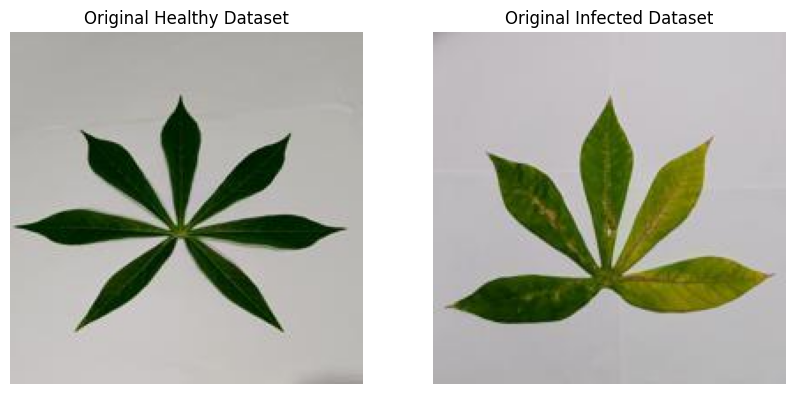

In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_path_healthy = "Healthy-Sample.jpg"
healthy = plt.imread(image_path_healthy)

image_path_infected = "Infected-Sample1.jpg"
infected = plt.imread(image_path_infected)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(healthy)
plt.title('Original Healthy Dataset')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(infected)
plt.title('Original Infected Dataset')
plt.axis('off')

plt.show()


### APPLY GRAYSCALE TO THE DATASETS
-  Grayscale conversion simplifies the image to a single channel

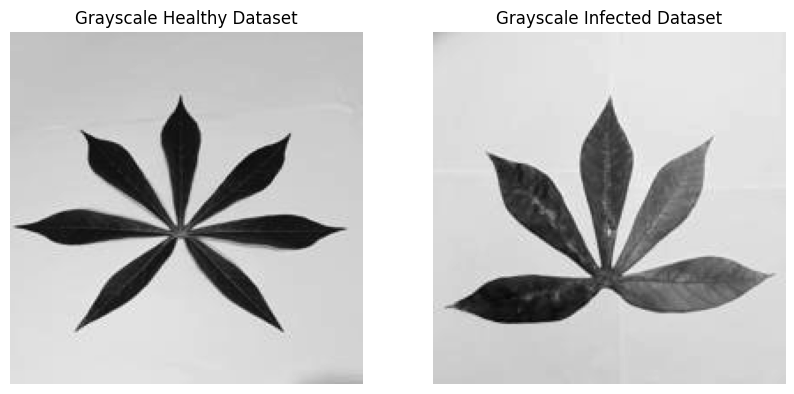

In [4]:
healthy = cv2.imread(image_path_healthy)
infected = cv2.imread(image_path_infected)

# Convert the images to grayscale
gray_imageHealthy = cv2.cvtColor(healthy, cv2.COLOR_BGR2GRAY)
gray_imageInfected = cv2.cvtColor(infected, cv2.COLOR_BGR2GRAY)

# Plot the images using subplot
plt.figure(figsize=(10, 5))

# Plot healthy image
plt.subplot(1, 2, 1)
plt.imshow(gray_imageHealthy, cmap='gray')
plt.title('Grayscale Healthy Dataset')
plt.axis('off')

# Plot infected image
plt.subplot(1, 2, 2)
plt.imshow(gray_imageInfected, cmap='gray')
plt.title('Grayscale Infected Dataset')
plt.axis('off')

plt.show()

### APPLY THRESHOLDING
- Allows you to separate objects from the background based on their intensity levels.

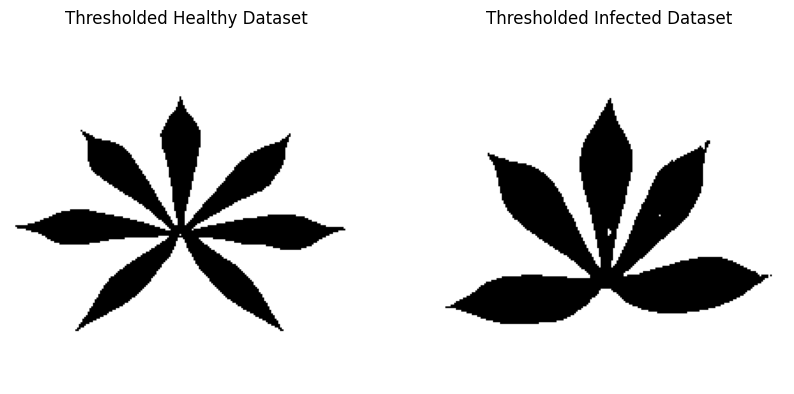

In [5]:
# Apply thresholding
_, thresh_img1 = cv2.threshold(gray_imageHealthy, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
_, thresh_img2 = cv2.threshold(gray_imageInfected, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(thresh_img1, cmap='gray')
plt.title('Thresholded Healthy Dataset')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresh_img2, cmap='gray')
plt.title('Thresholded Infected Dataset')
plt.axis('off')
plt.show()




### APPLY IMAGE SUBTRACTION
- Apply Image Subtraction to remove the foreground of the image dataset

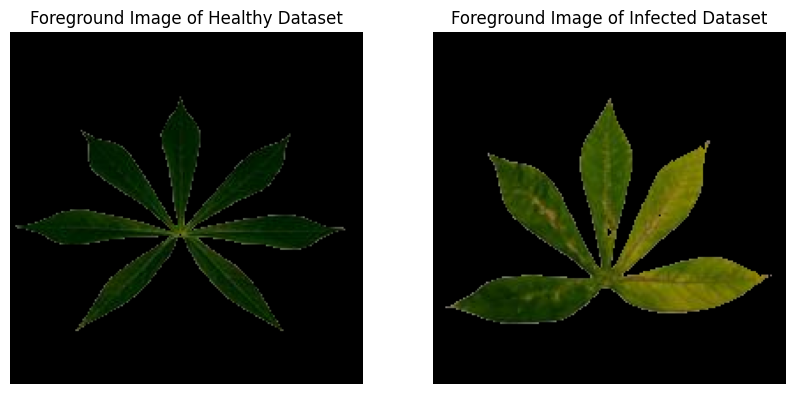

In [4]:
# Invert the thresholded image
thresh_img_inv1 = cv2.bitwise_not(thresh_img1)
thresh_img_inv2 = cv2.bitwise_not(thresh_img2)

fg_imgHealthy = cv2.bitwise_and(healthy, healthy, mask=thresh_img_inv1)
fg_imgInfected = cv2.bitwise_and(infected, infected, mask=thresh_img_inv2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(fg_imgHealthy, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image of Healthy Dataset')
plt.axis('off')

plt.subplot(1, 2, 2)  # Corrected from 1
plt.imshow(cv2.cvtColor(fg_imgInfected, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image of Infected Dataset')
plt.axis('off')

plt.show()

## APPLY GAUSSIAN FILTERING


* Apply Gaussian Filter to remove unecessary noise

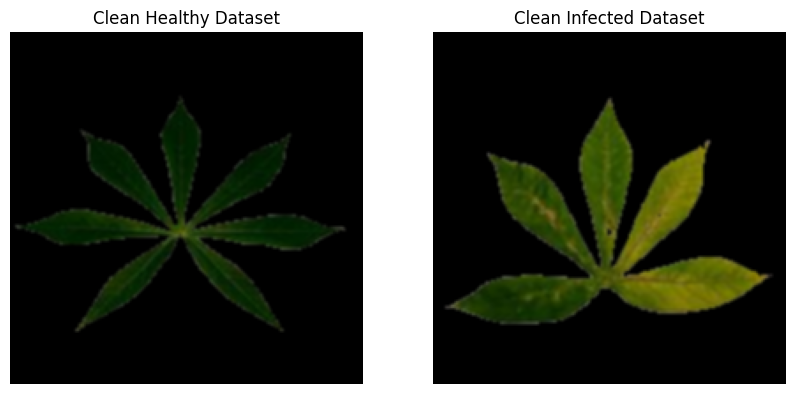

In [7]:
# Apply Gaussian filter to remove noise
clean_fg_imgHealthy = cv2.GaussianBlur(fg_imgHealthy, (3, 3), 0)
clean_fg_imgInfected = cv2.GaussianBlur(fg_imgInfected, (3, 3), 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(clean_fg_imgHealthy, cv2.COLOR_BGR2RGB))
plt.title('Clean Healthy Dataset')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(clean_fg_imgInfected, cv2.COLOR_BGR2RGB))
plt.title('Clean Infected Dataset')
plt.axis('off')

plt.show()
